In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Load Dataset
fashion_mnist = input_data.read_data_sets('./dataset/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-labels-idx1-ubyte.gz
Extracting ./dataset/t10k-images-idx3-ubyte.gz
Extracting ./dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
img = fashion_mnist.train.images[0].reshape(28,28)

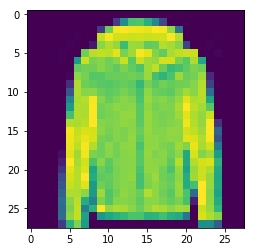

In [4]:
plt.imshow(img)

In [5]:
# Define Feature Column
feat_cols = [tf.feature_column.numeric_column('x', shape=[28,28])]

In [6]:
# DNN Classifier Model
dnn_model = tf.estimator.DNNClassifier(feature_columns=feat_cols, hidden_units=[256, 32], optimizer=tf.train.AdamOptimizer(1e-4), n_classes=10, dropout=0.1, model_dir='./mnist_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AEE824F0B8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
def process_data(data=None):
    return data.images, data.labels.astype(np.int32)

In [8]:
# Load Training Data
X, y = process_data(data=fashion_mnist.train)[0], process_data(data=fashion_mnist.train)[1]

In [9]:
# Load Test Data
X_test, y_test = process_data(data=fashion_mnist.test)[0], process_data(data=fashion_mnist.test)[1]

In [10]:
X.shape, y.shape

((55000, 784), (55000,))

In [11]:
# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44000, 784), (44000,), (10000, 784), (10000,))

In [12]:
# Train the Model
train_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_train}, y=y_train, num_epochs=None, batch_size=50, shuffle=True)

In [13]:
# Validation/Evaluation Input
eval_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_val}, y=y_val, num_epochs=1000, batch_size=10, shuffle=False)

In [14]:
# Test Input
test_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_test}, y=y_test, num_epochs=1, batch_size=10, shuffle=False)

In [15]:
# Training the Model
dnn_model.train(input_fn=train_input, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model\model.ckpt-102000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 102001 into ./mnist_model\model.ckpt.
INFO:tensorflow:loss = 32.99555, step = 102001
INFO:tensorflow:global_step/sec: 177.721
INFO:tensorflow:loss = 29.03215, step = 102101 (0.569 sec)
INFO:tensorflow:global_step/sec: 311.705
INFO:tensorflow:loss = 34.474968, step = 102201 (0.317 sec)
INFO:tensorflow:global_step/sec: 308.819
INFO:tensorflow:loss = 31.699364, step = 102301 (0.324 sec)
INFO:tensorflow:global_step/sec: 353.559
INFO:tensorflow:loss = 24.923971, step = 102401 (0.282 sec)
INFO:tensorflow:global_step/sec: 326.984
INFO:tensorflow:loss = 30.406912, step = 102501 (0.307 sec)
INFO:tensorflow:global_step/sec: 352.314
INFO:tensorflow:loss

In [16]:
# Validate the Model Performance
dnn_model.evaluate(input_fn=eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-05-23:21:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model\model.ckpt-103000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyboardInterrupt: 

In [ ]:
# Predict Labels for Test Data
y_pred = dnn_model.predict(input_fn=test_input)

In [ ]:
# List of Predictions
list(y_pred)

In [ ]:
final_preds = []

for pred in y_pred:
    final_preds.append(pred['predictions'])

print(len(final_preds))

In [ ]:
from sklearn.metrics import mean_squared_error, classification_report

In [ ]:
# Root Mean Squared Error# Root M 
mean_squared_error(y_test,final_preds)**0.5

In [ ]:
# Fashion MNIST labels
fashion_mnist_labels = {'0': , '1', '2', '3', '4' , '5', '6', '7', '8' ,'9'}

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(fashion_mnist_labels[pred_idx], fashion_mnist_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
# Evaluate accuracy
accuracy_score = dnn_model.evaluate(input_fn=train_input)["accuracy"]
print("\nTest Accuracy: {0:f}%\n".format(accuracy_score*100))

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./dataset/')

def input(dataset):
    return dataset.images, dataset.labels.astype(np.int32)

# Specify feature
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

# Build 2 layer DNN classifier
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[256, 32],
    optimizer=tf.train.AdamOptimizer(1e-4),
    n_classes=10,
    dropout=0.1,
    model_dir="./mnist_model"
)

# Define the training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": input(mnist.train)[0]},
    y=input(mnist.train)[1],
    num_epochs=None,
    batch_size=50,
    shuffle=True
)

classifier.train(input_fn=train_input_fn, steps=100000)

# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": input(mnist.test)[0]},
    y=input(mnist.test)[1],
    num_epochs=1,
    shuffle=False
)

# Evaluate accuracy
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("\nTest Accuracy: {0:f}%\n".format(accuracy_score*100))